In [25]:
import os
import pandas as pd 
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [26]:
train_path = "./src/train"
test_path =  "./src/test"

## Prepare Train Data

In [27]:
emotion_list = os.listdir(train_path)
categories = []
name_of_image = []
for emotion in emotion_list:
    filenames = os.listdir(train_path+ '/' + emotion)
    for filename in filenames:
        name_of_image.append(filename)
        categories.append(emotion)

In [28]:
df = pd.DataFrame({
    'Filename' : name_of_image,
    'Category' : categories
})

In [29]:
class_name = emotion_list
class_name

['angry', 'disgust', 'fear', 'fearful', 'happy', 'neutral', 'sad', 'surprise']

In [30]:
df['Category'] = df['Category'].replace({'angry': 0, 'disgust': 1, 'fear' : 2, 'happy' : 3, 'neutral' : 4, 'sad' : 5, 'surprise' : 6})

In [31]:
df = df.sample(frac=1).reset_index(drop=True)

In [32]:
df.head()

,Filename,Category
0,im1645.png,3
1,Training_78422938.jpg,4
2,Training_16956138.jpg,4
3,Training_84287869.jpg,2
4,im6429.png,3


<Axes: >

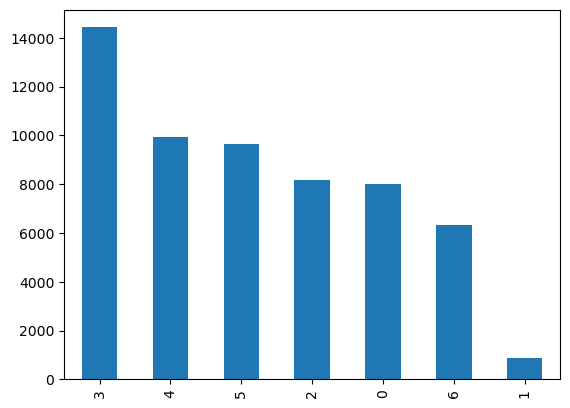

In [33]:
df['Category'].value_counts().plot.bar()

happy


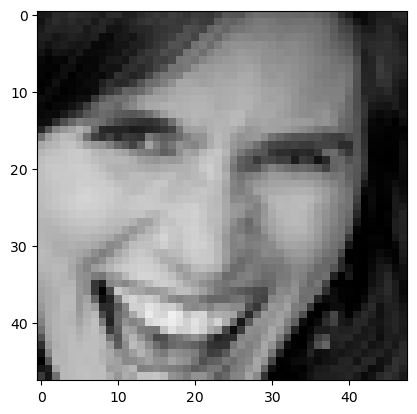

In [34]:
random_number = random.randint(0,df.shape[0])
image = load_img(train_path + '/' + class_name[df.iloc[random_number][1]] + '/' + df.iloc[random_number][0])
print(class_name[df.iloc[random_number][1]])
plt.imshow(image)

In [35]:
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=32)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

## Train Data Generation

In [ ]:
train_generation = ImageDataGenerator(
    width_shift_range= 0.1,
    height_shift_range= 0.1,
    horizontal_flip = True,
    rescale= 1/255,
    validation_split = 0.2
)

validation_generation = ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.2
)

In [ ]:
train_generator = train_generation.flow_from_directory(
    directory = train_path,
    target_size = (48, 48),        
    batch_size = 64,           
    color_mode = "grayscale",  
    class_mode = "categorical",   
    subset = "training",
    classes = class_name
)
validation_generator = validation_generation.flow_from_directory(
    directory = test_path,
    target_size = (48, 48),        
    batch_size = 64,        
    color_mode = "grayscale",        
    class_mode = "categorical",      
    subset = "validation",
    classes = class_name
)

Found 45936 images belonging to 8 classes.
Found 2868 images belonging to 8 classes.


In [61]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import tensorflow as tf 

model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(len(class_name),kernel_initializer='he_normal', activation = 'softmax'))

In [62]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='RMSprop')

In [63]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='model.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
early = EarlyStopping(monitor="loss", mode="min", patience=8)

callbacks_list = [checkpoint, early]

In [64]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[callbacks_list]
)

Epoch 1/50
718/718 [==============================] - 53s 68ms/step - loss: 1.9154 - accuracy: 0.3179 - val_loss: 1.4901 - val_accuracy: 0.4397
Epoch 2/50
718/718 [==============================] - 47s 65ms/step - loss: 1.3459 - accuracy: 0.4929 - val_loss: 1.2636 - val_accuracy: 0.5192
Epoch 3/50
718/718 [==============================] - 46s 65ms/step - loss: 1.2246 - accuracy: 0.5459 - val_loss: 1.1190 - val_accuracy: 0.5816
Epoch 4/50
718/718 [==============================] - 47s 65ms/step - loss: 1.1595 - accuracy: 0.5736 - val_loss: 1.0748 - val_accuracy: 0.5851
Epoch 5/50
718/718 [==============================] - 47s 66ms/step - loss: 1.1044 - accuracy: 0.5946 - val_loss: 1.0634 - val_accuracy: 0.5962
Epoch 6/50
718/718 [==============================] - 48s 67ms/step - loss: 1.0719 - accuracy: 0.6090 - val_loss: 1.0189 - val_accuracy: 0.6189
Epoch 7/50
718/718 [==============================] - 47s 66ms/step - loss: 1.0352 - accuracy: 0.6236 - val_loss: 1.0241 - val_accuracy:

In [65]:
model.save("model.h5")

## Visualization

Text(0.5, 1.0, 'Loss Curves')

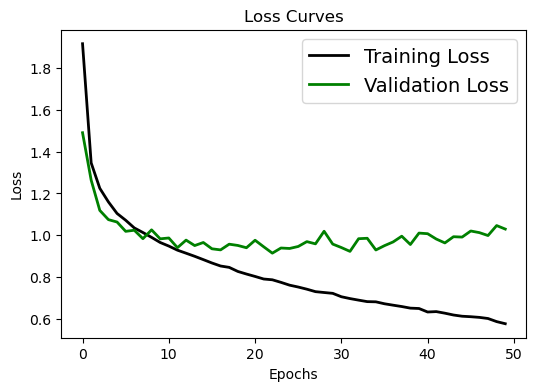

In [66]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

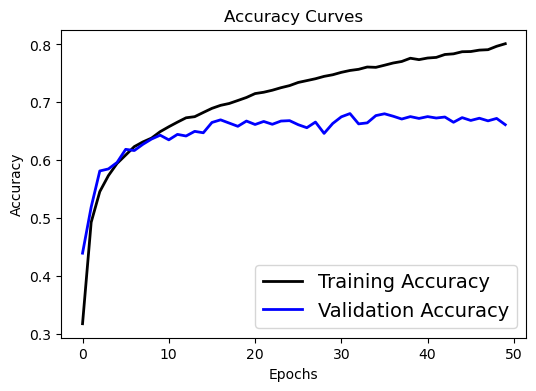

In [67]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)